In [1]:
!pip install torch torchvision

    100% |████████████████████████████████| 484.0MB 17kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5b146000 @  0x7fcf5843c1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 24.4MB/s 
    100% |████████████████████████████████| 2.0MB 21.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [0]:
# Hyperparameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 50
batch_size = 100
learning_rate = 0.001

In [4]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Processing...
Done!


In [5]:
print(len(train_dataset))  # 60000
print(len(test_dataset))   # 10000
print(len(train_loader))   # 600
print(len(test_loader))    # 100

60000
10000
600
100


(-0.5, 145.5, 145.5, -0.5)

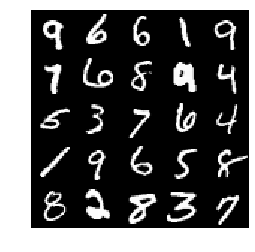

In [6]:
# 可視化
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    npimg = img.numpy()
    # [c, h, w] => [h, w, c]
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

images, labels = iter(train_loader).next()
images, labels = images[:25], labels[:25]
imshow(torchvision.utils.make_grid(images, nrow=5, padding=1))
plt.axis('off')

In [0]:
class MultiLayerPerceptron(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiLayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [8]:
model = MultiLayerPerceptron(input_size, hidden_size, num_classes)
print(model)

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [9]:
# テスト
image, label = iter(train_loader).next()
print("befire view:", image.size())
image = image.view(-1, 28 * 28)
print("after view:", image.size())
model(image)

befire view: torch.Size([100, 1, 28, 28])
after view: torch.Size([100, 784])


tensor([[-0.0038, -0.0009, -0.1234,  0.0011,  0.0667, -0.0270, -0.0418,
         -0.0461, -0.0593,  0.0316],
        [ 0.0264, -0.0170, -0.1023,  0.0490,  0.0832, -0.0985, -0.0514,
         -0.0930, -0.1154, -0.0399],
        [-0.0350, -0.0211, -0.0570,  0.0445,  0.0043, -0.0699, -0.0539,
          0.0254, -0.0079, -0.0536],
        [-0.0095,  0.0401,  0.0475,  0.1043,  0.0668, -0.0485, -0.0406,
          0.1154,  0.0124, -0.0107],
        [-0.0302, -0.0613, -0.0790,  0.0072, -0.0160,  0.0095, -0.0084,
         -0.0035, -0.0407, -0.0503],
        [-0.0704, -0.1522, -0.1011, -0.0291, -0.0136, -0.1364, -0.0807,
         -0.0447, -0.1449, -0.0828],
        [ 0.0068,  0.0315, -0.1147,  0.0058,  0.0519, -0.0759,  0.0264,
         -0.0183, -0.0353, -0.0412],
        [ 0.0501, -0.0476, -0.0219,  0.1403,  0.0682, -0.1090,  0.0043,
         -0.0326, -0.0733, -0.0117],
        [ 0.0030, -0.0549, -0.0527,  0.0842,  0.0473, -0.0995, -0.0205,
         -0.0181, -0.0565, -0.0366],
        [-0.0314, -

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
def train(train_loader):
    model.train()
    running_loss = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28 * 28)
        
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()

    train_loss = running_loss / len(train_loader)
    
    return train_loss


def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(test_loader):
            images = images.view(-1, 28 * 28)

            outputs = model(images)

            loss = criterion(outputs, labels)
            running_loss += loss.item()

            predicted = outputs.max(1, keepdim=True)[1]
            correct += predicted.eq(labels.view_as(predicted)).sum().item()
            total += labels.size(0)

    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    
    return val_loss, val_acc

In [12]:
loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)

    print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f'
          % (epoch, loss, val_loss, val_acc))
    
    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

epoch 0, loss: 2.2340 val_loss: 2.1583 val_acc: 0.5982
epoch 1, loss: 2.0826 val_loss: 1.9904 val_acc: 0.7011
epoch 2, loss: 1.9022 val_loss: 1.7902 val_acc: 0.7418
epoch 3, loss: 1.6954 val_loss: 1.5722 val_acc: 0.7663
epoch 4, loss: 1.4833 val_loss: 1.3627 val_acc: 0.7864
epoch 5, loss: 1.2901 val_loss: 1.1827 val_acc: 0.8030
epoch 6, loss: 1.1294 val_loss: 1.0380 val_acc: 0.8171
epoch 7, loss: 1.0020 val_loss: 0.9251 val_acc: 0.8285
epoch 8, loss: 0.9025 val_loss: 0.8370 val_acc: 0.8377
epoch 9, loss: 0.8245 val_loss: 0.7680 val_acc: 0.8472
epoch 10, loss: 0.7625 val_loss: 0.7125 val_acc: 0.8522
epoch 11, loss: 0.7125 val_loss: 0.6676 val_acc: 0.8577
epoch 12, loss: 0.6714 val_loss: 0.6305 val_acc: 0.8626
epoch 13, loss: 0.6372 val_loss: 0.5994 val_acc: 0.8652
epoch 14, loss: 0.6083 val_loss: 0.5729 val_acc: 0.8688
epoch 15, loss: 0.5835 val_loss: 0.5502 val_acc: 0.8722
epoch 16, loss: 0.5621 val_loss: 0.5303 val_acc: 0.8748
epoch 17, loss: 0.5433 val_loss: 0.5131 val_acc: 0.8778
ep

Text(0,0.5,'acc')

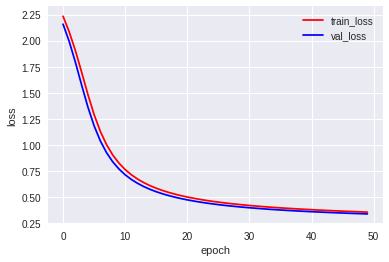

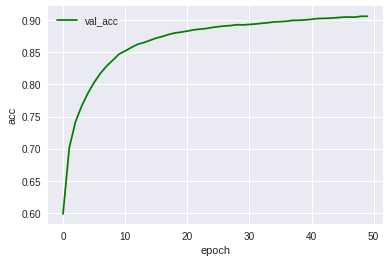

In [13]:
import matplotlib.pyplot as plt

# plot learning curve
plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')